# Modelamiento
---

In [159]:
# Importamos paquetes
import numpy as np
import pandas as pd
import verde as vd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [166]:
import sys
sys.path.append('/home/mofoko/Documents/Metodologias/tdsp_template/src')
from nombre_paquete.database import data_loader
from nombre_paquete.visualization import plotting
from nombre_paquete.models import model_loader
from nombre_paquete.evaluation import eval_loader

In [167]:
import importlib
# Make changes to the module's code
# Reload the module
importlib.reload(data_loader)
importlib.reload(plotting)
importlib.reload(model_loader)
importlib.reload(eval_loader)


<module 'nombre_paquete.evaluation.eval_loader' from '/home/mofoko/Documents/Metodologias/tdsp_template/src/nombre_paquete/evaluation/eval_loader.py'>

## Selección de características
---

In [71]:
# Definimos las variables categoricas
categorical = ['A_dom', 'A_reg', 'A_cont'] 
# Definimos las variables numericas
numeric = ['elevation', 'sedthick']
target = 'q'
# Features extraidas
features = ['knn', 'G', 'F', 'J', 'K', 'L']
# Variables geoespaciales
coords = ['lat', 'lng']
temporal = 'A_year'

In [5]:
db12_prep = data_loader.load_data_feat()
db12_prep

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick,knn,G,F,J,K,L
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0000,0.200705,0.000000,0.799295,0.239940,0.292253
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977,0.0000,0.202756,0.000033,0.797244,1.106536,0.300442
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0000,0.204807,0.000065,0.795193,1.973131,0.308631
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000,0.0000,0.206858,0.000098,0.793142,2.839727,0.316820
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983,0.0000,0.208909,0.000131,0.791091,3.706322,0.325009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949,0.0183,1.000000,0.960000,0.000000,14785.913267,-334.130187
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949,0.0200,1.000000,0.960000,0.000000,14785.913267,-334.143191
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949,0.0200,1.000000,0.960000,0.000000,14785.913267,-334.156196
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484,0.0200,1.000000,0.960000,0.000000,14785.913267,-334.169200


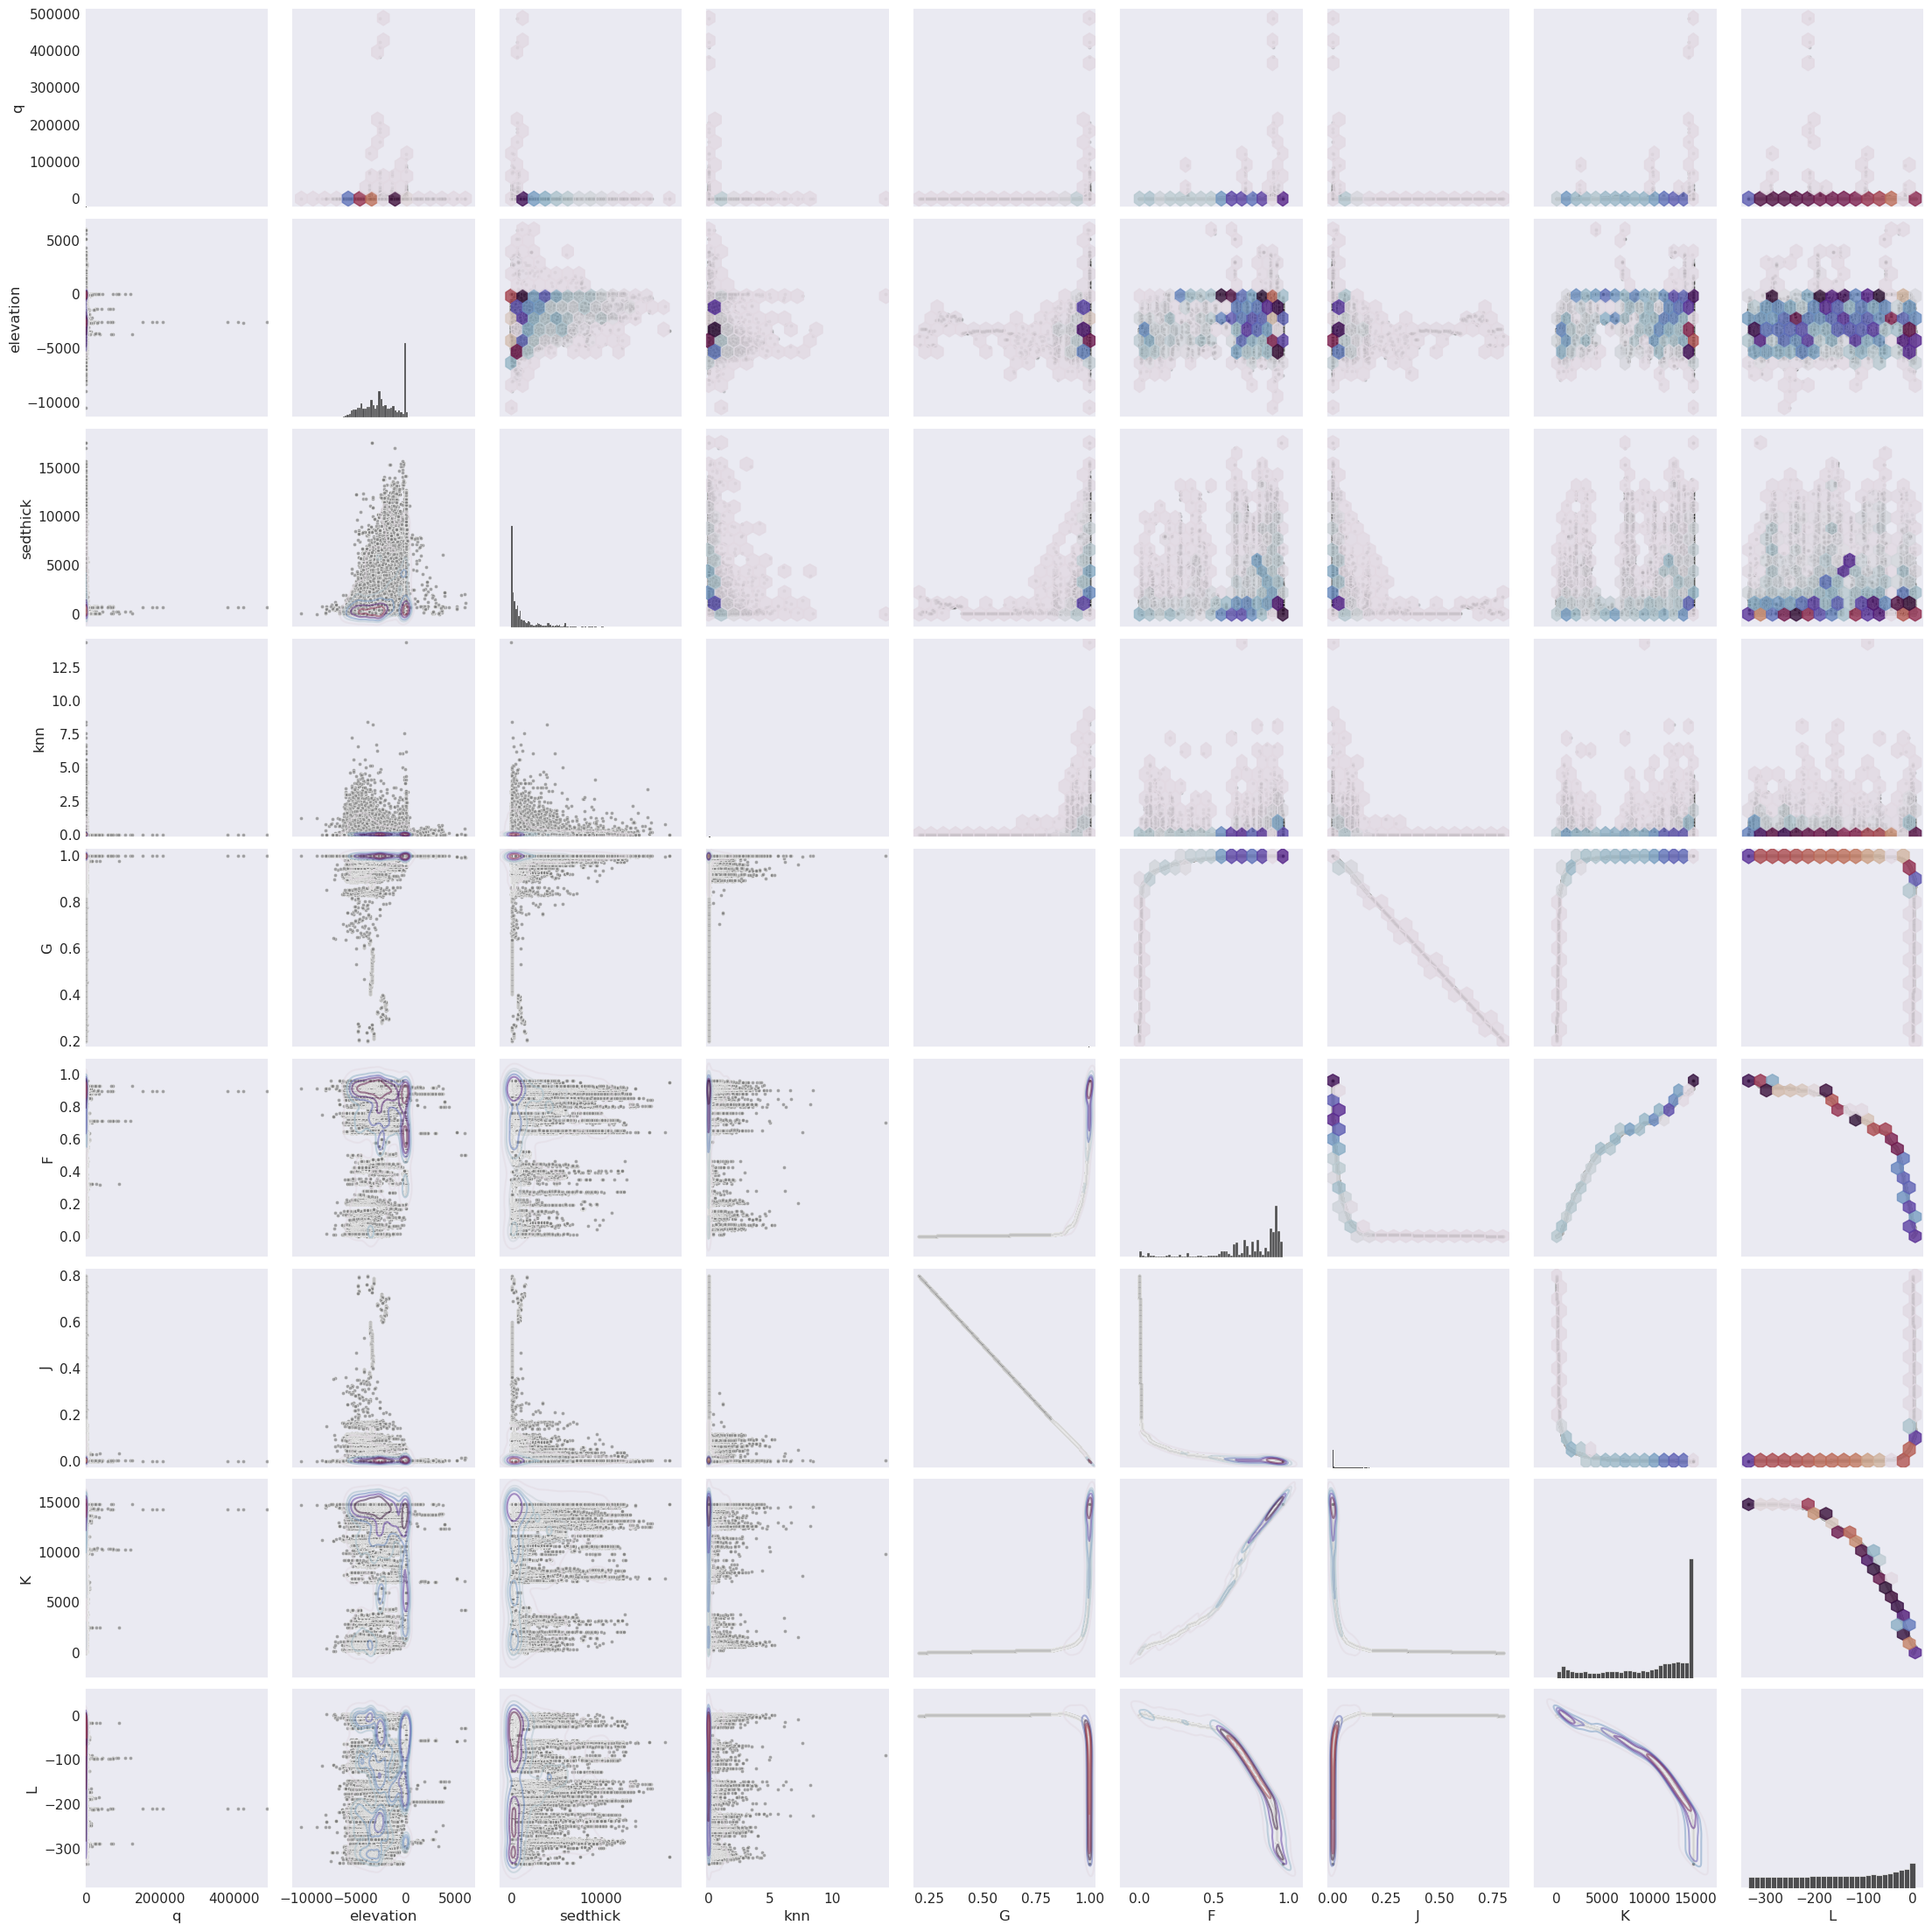

In [115]:
plotting.kde_hexbin_pairplot(db12_prep[numeric + features])

## Spatial Train test split
---

In [181]:
features + [numeric[1], target]

['knn', 'G', 'F', 'J', 'K', 'L', 'sedthick', 'q']

In [207]:
coordinates = tuple(db12_prep[col].to_numpy() for col in coords)
values = tuple(db12_prep[col].to_numpy() for col in features + [numeric[1], target])
train, test = vd.train_test_split(coordinates, values, test_size=.2, spacing=10, random_state=123)
coord_train, data_train, w_train  = train
coord_test, data_test, w_test  = test
X_train, y_train = data_train[:-1], data_train[-1]
X_test, y_test = data_test[:-1], data_test[-1]

In [193]:
data_train

(array([0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02]),
 array([0.20070479, 0.20275595, 0.2048071 , ..., 1.        , 1.        ,
        1.        ]),
 array([0.00000000e+00, 3.26543809e-05, 6.53087617e-05, ...,
        9.60000000e-01, 9.60000000e-01, 9.60000000e-01]),
 array([0.79929521, 0.79724405, 0.7951929 , ..., 0.        , 0.        ,
        0.        ]),
 array([2.39940351e-01, 1.10653586e+00, 1.97313137e+00, ...,
        1.47859133e+04, 1.47859133e+04, 1.47859133e+04]),
 array([ 2.92253487e-01,  3.00442392e-01,  3.08631296e-01, ...,
        -3.34156196e+02, -3.34169200e+02, -3.34182204e+02]),
 array([  85.99997711,   85.99997711, 1756.        , ..., 1872.39794922,
        2009.02148438, 2009.02148438]),
 array([201., 214.,  46., ...,  12.,  54., 256.]))

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


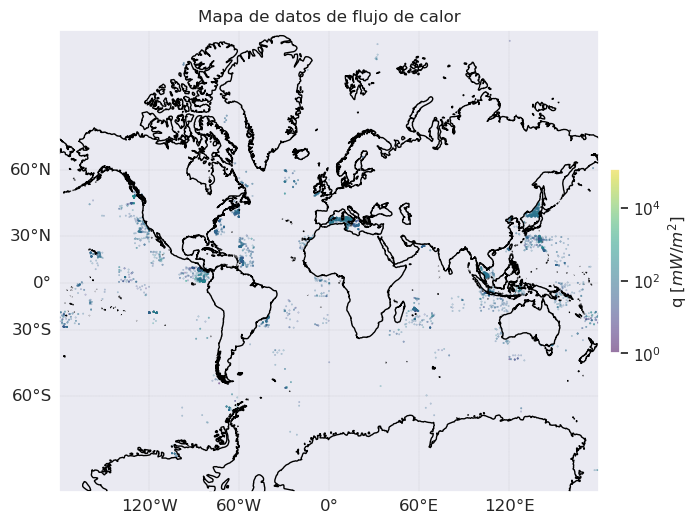

In [198]:
df_test = pd.DataFrame({'lat': coord_test[0],
                         'lng': coord_test[1],
                         'q': y_test
                         })
plotting.plot_map(df_test)

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


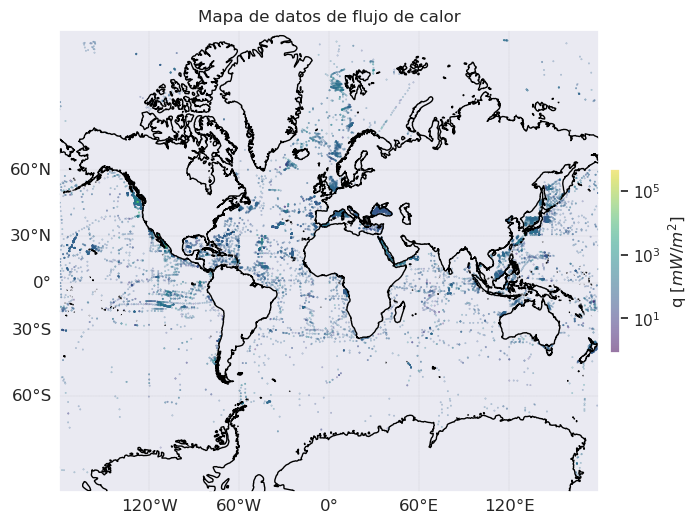

In [199]:
df_train = pd.DataFrame({'lat': coord_train[0],
                         'lng': coord_train[1],
                         'q': y_train
                         })
plotting.plot_map(df_train)

## Modelo Baseline
---

In [210]:
RANSAC = model_loader.polyRegressionRANSAC(len(X_train))
RANSAC = RANSAC.fit(pd.Series(X_train[-1]), y_train)
y_pred = RANSAC.predict(X_test[-1].reshape(-1, 1))

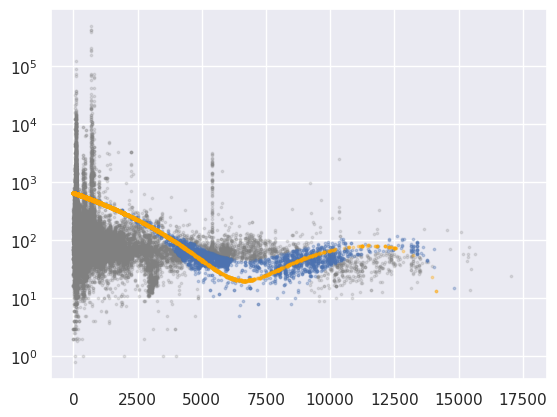

In [214]:
inlier_mask = RANSAC.inlier_mask_
idx_sed = -1
plt.scatter(X_train[idx_sed][~inlier_mask], y_train[~inlier_mask], color='gray', marker='.', alpha=0.2,
            label='RANSAC outliers', s=12)
plt.scatter(X_train[idx_sed][inlier_mask], y_train[inlier_mask], color='b', marker='.', alpha=0.3,
            label='RANSAC inliers', s=12)
plt.scatter(X_test[idx_sed], y_pred, color='orange', marker='.', alpha=0.3,
         label='RANSAC cubic', s=12)

plt.yscale('log')

In [215]:
eval_loader.eval_regres(y_pred, y_test)

,MSE,MAE,R2
0,7.723634e+06,445.464788,-0.007605


## Modelo 1
---
En esta sección del notebook, presentaremos el primer modelo implementado, que es un SVR (Support Vector Regression). En nuestro escenario, hemos utilizado un conjunto de datos que contiene información geoespacial y características relacionadas con el grosor sedimentario y el flujo de calor. El objetivo principal es predecir un valor de flujo de calor, basado en estas características espaciales y el grosor sedimentario, utilizando el enfoque de regresión.

El SVR es una variante del algoritmo de Support Vector Machines (SVM) adaptado para tareas de regresión. A diferencia de los métodos de regresión lineal tradicionales, el SVR puede manejar tanto relaciones lineales como no lineales entre las características y el objetivo. Esto lo logra mediante el uso de funciones de kernel para mapear los datos a un espacio de mayor dimensión, donde se encuentra más fácilmente una relación lineal.

En nuestro caso, hemos seleccionado siete características para alimentar el modelo SVR. Estas características incluyen el grosor sedimentario y otras seis características de tipo espacial (knn, G, F, J, K, L) que hemos considerado relevantes para nuestro problema. Al proporcionar estas características al modelo, esperamos que el SVR aprenda a mapear las entradas a un valor continuo que represente el objetivo deseado.

In [171]:
from sklearn.svm import SVR

In [226]:
# Convert the tuple to a matrix and transpose it
X_train_matrix = np.vstack(X_train)
X_train_matrix_T = np.transpose(X_train_matrix)
X_test_matrix = np.vstack(X_test)
X_test_matrix_T = np.transpose(X_test_matrix)

In [228]:
# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_matrix_T, y_train)
# Make predictions on the test set
y_pred = svr.predict(X_test_matrix_T)

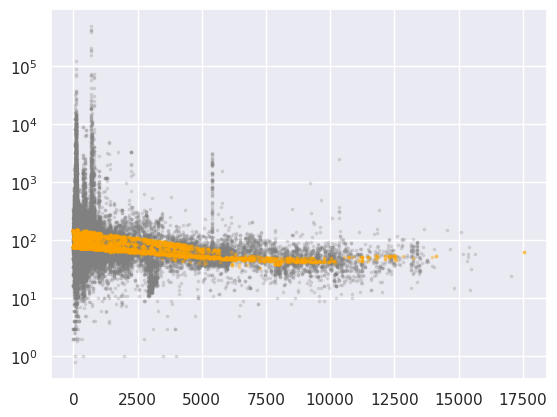

In [229]:
idx_sed = -1
plt.scatter(X_train[idx_sed], y_train, color='gray', marker='.', alpha=0.2,
            label='RANSAC outliers', s=12)
plt.scatter(X_test[idx_sed], y_pred, color='orange', marker='.', alpha=0.3,
         label='RANSAC cubic', s=12)
plt.yscale('log')

In [230]:
eval_loader.eval_regres(y_pred, y_test)

,MSE,MAE,R2
0,7.672432e+06,160.249916,-0.000926
